<a href="https://colab.research.google.com/github/michaelhasey/Archi_Base/blob/master/2_Scraper_Predictor_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **A. Identify target to scrape**

#### **1. Identify architect / style hashtag and number of images required**

In [0]:
target = 'bjarkeingelsgroup'
number = 500

#### **2. Mount drive (if not already done)**

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **B. Scrape images**

#### **1. Change Directory**

In [0]:
import os
if os.getcwd() != '/content/drive/My Drive/Colab Notebooks/GA_Capstone/Data/2_prediction_data':
    os.chdir('/content/drive/My Drive/Colab Notebooks/GA_Capstone/Data/2_prediction_data')
    print("Directory changed.")

Directory changed.


#### **2. Make new directory for target images**

In [0]:
os.mkdir(f'{target}')

#### **3. Imports // Installs**

In [0]:
import json
import requests

In [0]:
pip install imgaug==0.2.5

     |████████████████████████████████| 563kB 4.7MB/s 
  Created wheel for imgaug: filename=imgaug-0.2.5-cp36-none-any.whl size=561439 sha256=e30698c1cf7ea18aed525785b94b76343dc3479d81ea16e49ec19dd0753f3ce9
  Stored in directory: /root/.cache/pip/wheels/31/48/c8/ca3345e8582a078de94243996e148377ef66fdb845557bae0b
Successfully built imgaug
  Found existing installation: imgaug 0.2.9
    Uninstalling imgaug-0.2.9:
      Successfully uninstalled imgaug-0.2.9


In [0]:
pip install instagram-scraper --upgrade

     |████████████████████████████████| 389kB 10.1MB/s 
     |████████████████████████████████| 3.3MB 12.9MB/s 
     |████████████████████████████████| 26.9MB 111kB/s 
  Created wheel for instagram-scraper: filename=instagram_scraper-1.9.0-cp36-none-any.whl size=35657 sha256=c1e7163bf129caee6df4436aa748939aa5e5ad5e30ae260e61b05de6027cfb0a
  Stored in directory: /root/.cache/pip/wheels/4d/ad/7f/090fb8b63e522fd57ac963ae2a6010dcce32314a64fd572645
  Created wheel for moviepy: filename=moviepy-1.0.3-cp36-none-any.whl size=110728 sha256=51c4e2715c6cfd4be8a0f4974a2dda4c3ea716ecd9a1afbed2a635d9c2d1d549
  Stored in directory: /root/.cache/pip/wheels/e0/fe/1c/f4e6dca9e828d4b979c04e461d7fcc5b8e7bd35f947e665b65
  Created wheel for proglog: filename=proglog-0.1.9-cp36-none-any.whl size=6149 sha256=89660b136c5d4278207836be75165c4b42d0a446ffc4996f292500815d156d39
  Stored in directory: /root/.cache/pip/wheels/65/56/60/1d0306a8d90b188af393c1812ddb502a8821b70917f82dcc00
Successfully built instagram-scr

#### **4. Scrape**

In [0]:
! instagram-scraper --tag '{target}' --maximum '{number}' --destination '{target}' --media-types image, story-image --quiet --media-metadata

In [0]:
with open(f'{target}/{target}.json') as f:
  data = json.load(f)

In [0]:
os.mkdir(f'{target}/images')

In [0]:
for i in range(len(data['GraphImages'])):
    url = data['GraphImages'][i]['display_url']
    img_data = requests.get(url).content
    with open(f'{target}/images/{target}_{i}.jpg', 'wb') as handler:
        handler.write(img_data)

# **C. Load pre-trained RNN model**

#### **1. Install / Imports**

In [0]:
pip install "torch==1.4" "torchvision==0.5.0"

     |████████████████████████████████| 753.4MB 20kB/s 
     |████████████████████████████████| 4.0MB 106kB/s 
  Found existing installation: torch 1.5.0+cu101
    Uninstalling torch-1.5.0+cu101:
      Successfully uninstalled torch-1.5.0+cu101
  Found existing installation: torchvision 0.6.0+cu101
    Uninstalling torchvision-0.6.0+cu101:
      Successfully uninstalled torchvision-0.6.0+cu101


In [0]:
import os

#### **2. Change home directory location**

In [0]:
if os.getcwd() != '/content/drive/My Drive/Colab Notebooks/GA_Capstone':
    os.chdir('/content/drive/My Drive/Colab Notebooks/GA_Capstone')
    print("Directory changed.") 

Directory changed.


#### **3. Load folder categories**

In [0]:
labels = os.listdir("Data/1_training_data")
print("No. of labels: {}".format(len(labels)))
print("-----------------")

for label in labels:
      print("{}, {} files".format(label, len(os.listdir("Data/1_training_data/"+label))))

No. of labels: 9
-----------------
models, 6 files
posters_books, 201 files
people, 101 files
drawings, 201 files
aerial, 301 files
interior, 301 files
closeup, 301 files
street, 301 files
texture, 301 files


#### **4. Load FastAi features**

In [0]:
from fastai.vision import *
from fastai.metrics import accuracy

#### **5. Create learner object**

In [0]:
learner = load_learner('./RNN_Models/final_model/')

# **D. Make predictions**

#### **1. Create folders for prediction outputs**

In [0]:
if os.getcwd() != '/content/drive/My Drive/Colab Notebooks/GA_Capstone':
    os.chdir('/content/drive/My Drive/Colab Notebooks/GA_Capstone')
    print("Directory changed.")

In [0]:
os.mkdir(f'Predictions/{target}')

for elem in labels:
  os.mkdir(f'Predictions/{target}/{elem}')

#### **2. Test print prediction image**

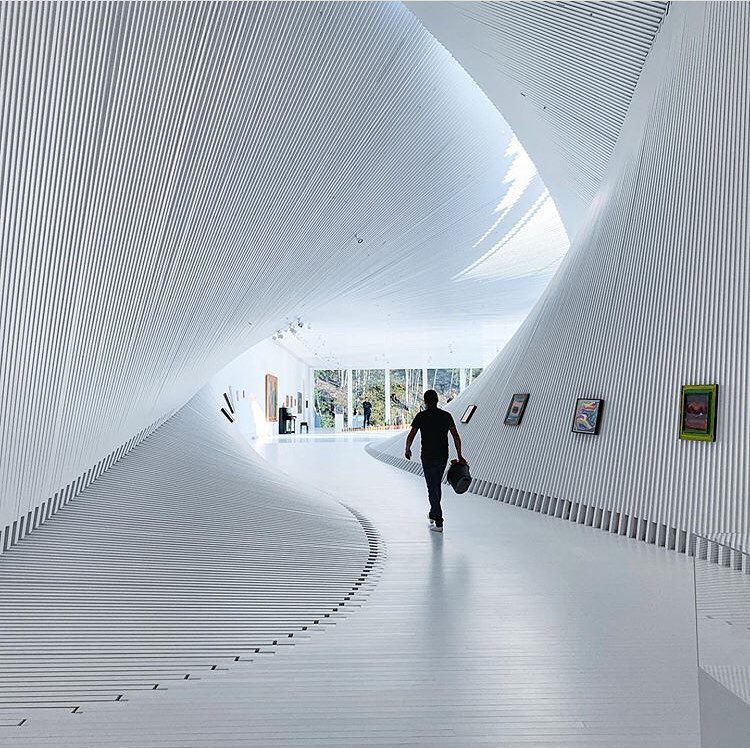

In [0]:
import glob

img = open_image(glob.glob(f'Data/2_prediction_data/{target}/images/*.jpg')[1])
img

#### **3. Predict image class & save to corresponding folder**

In [0]:
# create save_img function

def save_img(img, fn):
  x = np.minimum(np.maximum(image2np(img.data*255), 0), 255).astype(np.uint8)
  PIL.Image.fromarray(x).save(fn)

In [0]:
counter = 0

for elem in glob.glob(f'Data/2_prediction_data/{target}/images/*.jpg'):

  try:
    img2 = open_image(elem)

    pred_class,pred_idx,outputs = learner.predict(img2)
    print(str(pred_class))

    counter += 1

    if str(pred_class) == 'street':
        save_img(img2, f'Predictions/{target}/street/street_{counter}.jpg')
    if str(pred_class) == 'aerial':
        save_img(img2, f'Predictions/{target}/aerial/aerial_{counter}.jpg')
    if str(pred_class) == 'interior':
        save_img(img2, f'Predictions/{target}/interior/interior_{counter}.jpg')
    if str(pred_class) == 'texture':
        save_img(img2, f'Predictions/{target}/texture/texture_{counter}.jpg')
    if str(pred_class) == 'posters_books':
        save_img(img2, f'Predictions/{target}/posters_books/posters_books_{counter}.jpg')
    if str(pred_class) == 'people':
        save_img(img2, f'Predictions/{target}/people/people_{counter}.jpg')
    if str(pred_class) == 'drawings':
        save_img(img2, f'Predictions/{target}/drawings/drawings_{counter}.jpg')
    if str(pred_class) == 'closeup':
        save_img(img2, f'Predictions/{target}/closeup/closeup_{counter}.jpg')

  except: 
    pass

interior
interior
aerial
street
street
street
interior
street
aerial
street
interior
people
drawings
closeup
street
drawings
people
interior
interior
street
street
street
street
aerial
interior
drawings
drawings
posters_books
posters_books
street
street
interior
texture
closeup
posters_books
street
interior
street
street
people
posters_books
posters_books
people
posters_books
street
posters_books
drawings
aerial
people
street
street
aerial
texture
street
posters_books
street
aerial
interior
closeup
interior
street
posters_books
texture
people
street
aerial
posters_books
posters_books
closeup
posters_books
posters_books
people
street
street
posters_books
people
interior
street
street
posters_books
posters_books
posters_books
posters_books
drawings
street
aerial
street
drawings
street
street
posters_books
people
drawings
street
interior
posters_books
interior
interior
street
street
interior
street
street
aerial
street
people
street
aerial
street
posters_books
drawings
street
street
close

#### **4. Notify when training complete**

In [0]:
from IPython.display import *

Audio("Song/smash_mouth.mp3", autoplay=True)